In [17]:
%matplotlib inline

import torch
from torch import nn
import numpy as np
from matplotlib import pyplot as plt

plt.style.use("ggplot")
plt.rcParams["figure.figsize"] = (12, 7)

# Les fonctions à paramètres en Python

Soit la fonction suivante :

$$f(x) = ax + b$$

Elle prend en entrée un nombre $x$ et renvoie un output, mais la valeur renvoyée est déterminée par deux paramètres $a$ et $b$.

On note donc plutôt:

$$f_\theta(x) = ax+b$$

où $\theta = (a, b)$.

Pour représenter ça en python, on va souvent utiliser des classes.

In [1]:
class AffineFunction:
    def __init__(self, a, b):
        self.a = a
        self.b = b
    def __call__(self, x):
        return self.a * x + self.b

In [2]:
f = AffineFunction(3, 4)
f(10)

34

Lorsque l'on veut apprendre une fonction qui corresponde le mieux possible à des données, on va chercher à ajuster $\theta$ pour minimiser une fonction de loss sur les données.

La fonction de loss considère les données comme fixées et peut alors se voir comme une fonction des paramètres, $l(\theta)$.

C'est là qu'intervient la descente de gradient : En modifiant $\theta$, on peut minimiser $l(\theta)$ sur les données et obtenir des paramètres optimaux.

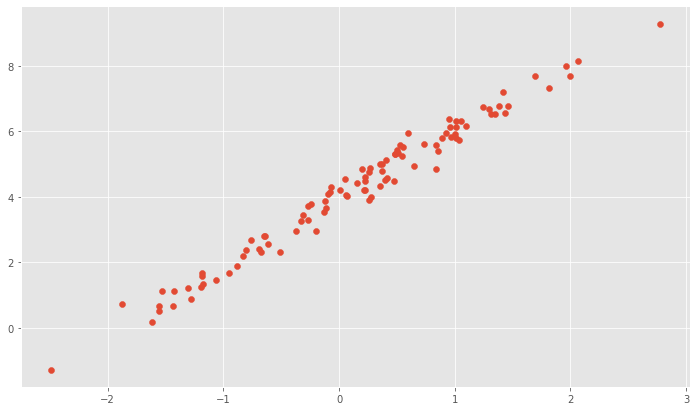

In [8]:
# Génération de données artificielles
X = np.random.randn(100)
true_a, true_b = 2, 4
y = true_a * X + true_b + np.random.randn(100)/3
plt.scatter(X, y)

Le but est donc de retrouver `true_a` et `true_b` par descente de gradient. La loss que nous utiliserons sera la mean squared error.

In [53]:
# On passe X et y en torch pour qu'ils soient compatibles
X_pt = torch.tensor(X).float().reshape(-1, 1)
y_pt = torch.tensor(y).reshape(-1, 1)

theta = torch.tensor([1, 1], dtype=torch.float, requires_grad=True)
f = AffineFunction(theta[0], theta[1])

n_epochs = 100
learning_rate = 0.3
optimizer = torch.optim.Adam([theta], lr=learning_rate)

for epoch in range(n_epochs):
    output = f(X_pt)
    loss = ((output - y_pt)**2).mean()
    loss.backward()
    
    if epoch % 10 == 0:
        print(f"{epoch:0>2d} -> theta={theta.detach().numpy().round(2)} loss={loss.item():.3f}")
    
    optimizer.step()
    optimizer.zero_grad()


00 -> theta=[1. 1.] loss=11.010
10 -> theta=[2.87 3.73] loss=0.745
20 -> theta=[1.71 4.67] loss=0.644
30 -> theta=[1.88 4.11] loss=0.143
40 -> theta=[2.3  3.71] loss=0.194
50 -> theta=[1.97 3.92] loss=0.106
60 -> theta=[2.08 4.07] loss=0.109
70 -> theta=[2.05 3.93] loss=0.097
80 -> theta=[2.08 3.94] loss=0.096
90 -> theta=[2.05 3.98] loss=0.096


On a bien retrouvé les valeurs de a et b.

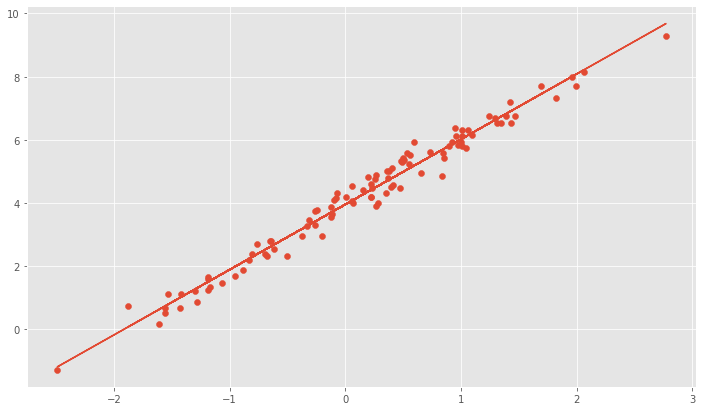

In [54]:
plt.scatter(X, y)
plt.plot(X, f(X_pt).detach().numpy().squeeze())

# Réécriture comme un module pytorch

In [55]:
class Model(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(1, 1) # fonction a*x + b

    def forward(self, x):
        return self.linear(x)

In [56]:
output.shape, y_pt.shape

(torch.Size([100, 1]), torch.Size([100, 1]))

In [60]:
model = Model() # L'initialisation des paramètres est faite automatiquement

n_epochs = 100
learning_rate = 0.1
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

for epoch in range(n_epochs):
    output = model(X_pt)
    loss = ((output - y_pt)**2).mean()
    loss.backward()
    
    a = model.linear.weight.detach().numpy().squeeze()
    b = model.linear.bias.detach().numpy().squeeze()
    
    if epoch % 10 == 0:
        print(f"{epoch:0>2d} -> a={a:.2f} b={b:.2f} loss={loss.item():.3f}")
    
    optimizer.step()
    optimizer.zero_grad()


00 -> a=0.21 b=0.14 loss=20.468
10 -> a=1.19 b=1.12 loss=9.708
20 -> a=2.01 b=2.04 loss=3.808
30 -> a=2.48 b=2.81 loss=1.428
40 -> a=2.53 b=3.38 loss=0.562
50 -> a=2.33 b=3.75 loss=0.196
60 -> a=2.11 b=3.94 loss=0.098
70 -> a=1.99 b=4.02 loss=0.102
80 -> a=1.99 b=4.03 loss=0.103
90 -> a=2.04 b=4.01 loss=0.098


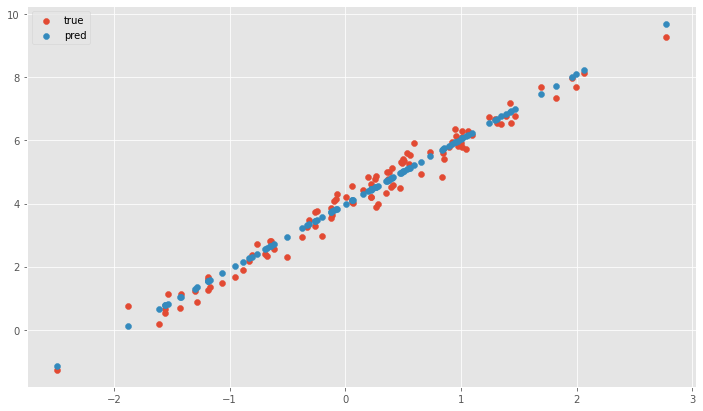

In [61]:
plt.scatter(X_pt.squeeze().detach().numpy(), y_pt.detach().numpy(), label="true")
plt.scatter(X_pt.squeeze().detach().numpy(), model(X_pt).detach().numpy(), label="pred")
plt.legend()